In [6]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import misc

from visual_generator import VisualGenerator
visualizer = VisualGenerator(image_folder='/home/ubuntu/sdf/results', node_folder='/home/ubuntu/sdf/results')

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
activation = np.load('/home/ubuntu/sdf/activations/conv5.npy')

In [29]:
# Normalize activations
avg_activation = np.tile(np.sum(activation, 0), (len(image_list), 1))
activation = np.divide(activation, avg_activation)

In [15]:
# Read in path for all the images
image_root = '/home/ubuntu/sdf/images/'
image_list_file = open('/home/ubuntu/sdf/activations/input.txt')
image_list = []
while True:
    path = image_list_file.readline()
    if not path:
        break
    image_list.append(path.strip())

In [5]:
len(image_list)

100000

In [30]:
def plot_activations(index):
    plt.imshow(misc.imread(image_root + image_list[index]))
    plt.show()
    nodes = []
    max_nodes = np.argsort(activation[index, :])[-20:]
    for i in max_nodes:
        nodes.append({'layer': 'conv5', 'index': i})
    fig = plt.figure(figsize=(20, 13))
    plt.imshow(visualizer.visualize_in_grid(nodes))
    plt.show()
    

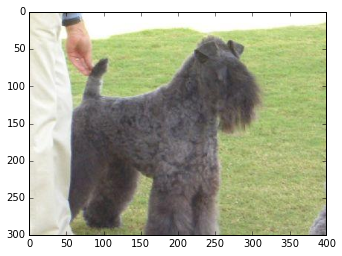

(2, 40, 12, 7, 42)


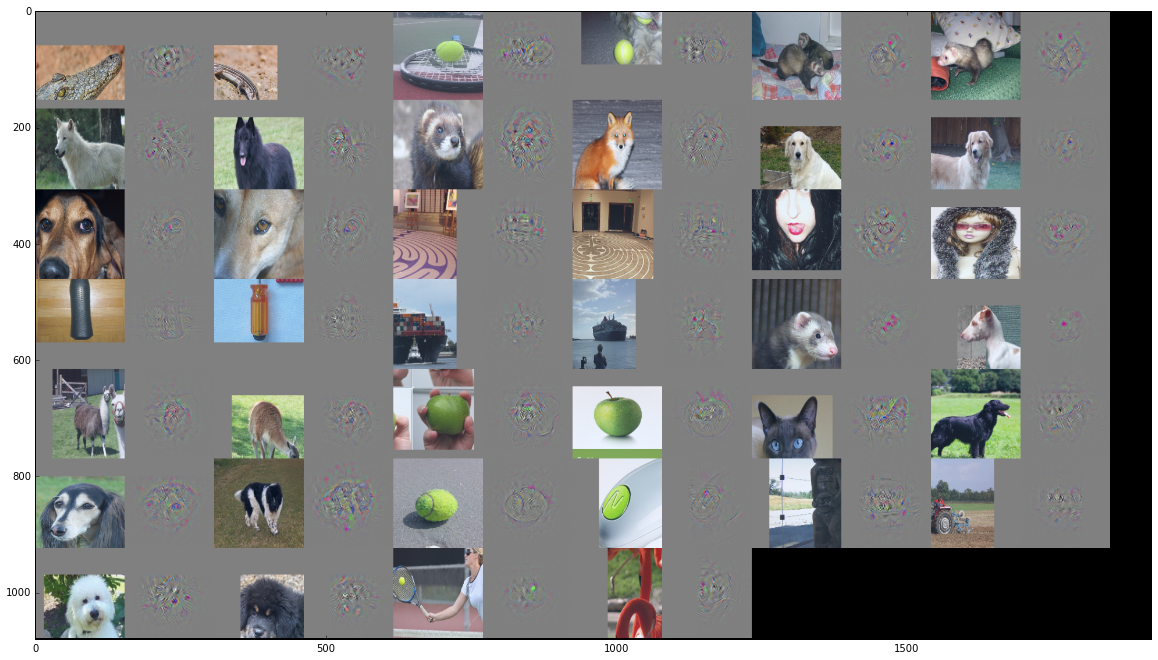

In [33]:
import random
plot_activations(random.randint(0, len(image_list)-1))

In [9]:
print(x[:10])
print(np.argsort(x[:10]))

[ 30.85036659  39.01681137  13.00929642  28.02774811  18.44221306
  25.06348419  29.68470192  83.27026367  20.34159279  30.30723763]
[2 4 8 5 3 6 9 0 1 7]
